In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
df=pd.read_csv('Profit Prediction using Linear Regression.csv')
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [75]:
df.tail()

,Marketing Spend,Administration,Transport,Area,Profit
45,1000.23,124153.04,1903.93,Dhaka,64926.08
46,1315.46,115816.21,297114.46,Rangpur,49490.75
47,0.00,135426.92,0.00,Ctg,42559.73
48,542.05,51743.15,0.00,Dhaka,35673.41
49,0.00,116983.80,45173.06,Ctg,14681.40


In [76]:
df.shape

(50, 5)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [78]:
df.describe()

,Marketing Spend,Administration,Transport,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [79]:
df.cov()

,Marketing Spend,Administration,Transport,Profit
Marketing Spend,2.107017e+09,2.963609e+08,3.847663e+09,1.735339e+09
Administration,2.963609e+08,7.849973e+08,-1.101690e+08,2.266673e+08
Transport,3.847663e+09,-1.101690e+08,1.495492e+10,3.685779e+09
Profit,1.735339e+09,2.266673e+08,3.685779e+09,1.624588e+09


In [80]:
df.var()

c:\users\malabar tech\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Marketing Spend    2.107017e+09
Administration     7.849973e+08
Transport          1.495492e+10
Profit             1.624588e+09
dtype: float64

In [81]:
corr=df.corr()
corr

,Marketing Spend,Administration,Transport,Profit
Marketing Spend,1.000000,0.230437,0.685442,0.937948
Administration,0.230437,1.000000,-0.032154,0.200717
Transport,0.685442,-0.032154,1.000000,0.747766
Profit,0.937948,0.200717,0.747766,1.000000


<AxesSubplot:>

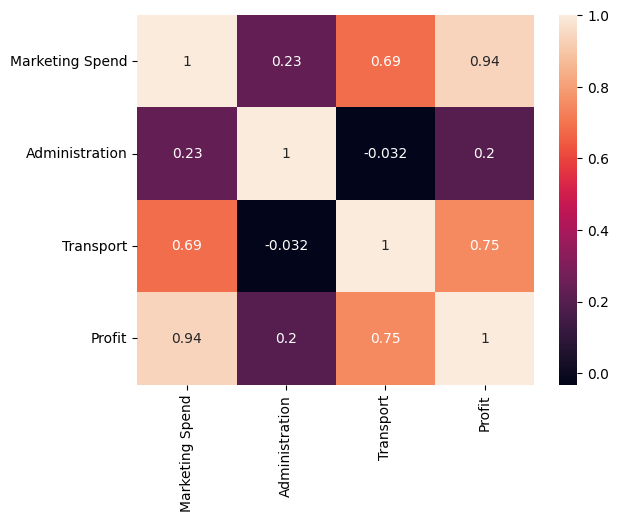

In [82]:
sns.heatmap(corr,annot=True)

In [83]:
df.isna().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [84]:
df.columns

Index(['Marketing Spend', 'Administration', 'Transport', 'Area', 'Profit'], dtype='object')

<AxesSubplot:>

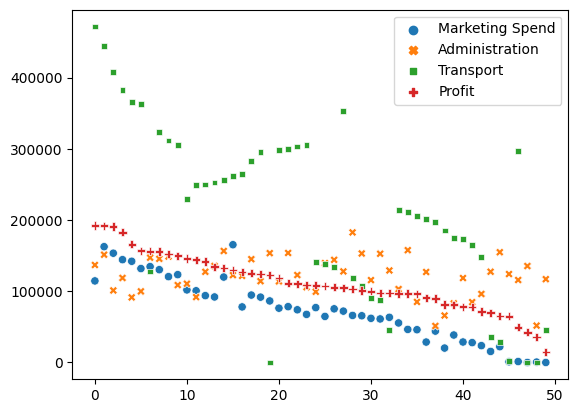

In [85]:
sns.scatterplot(data=df)

<AxesSubplot:xlabel='Marketing Spend', ylabel='Administration'>

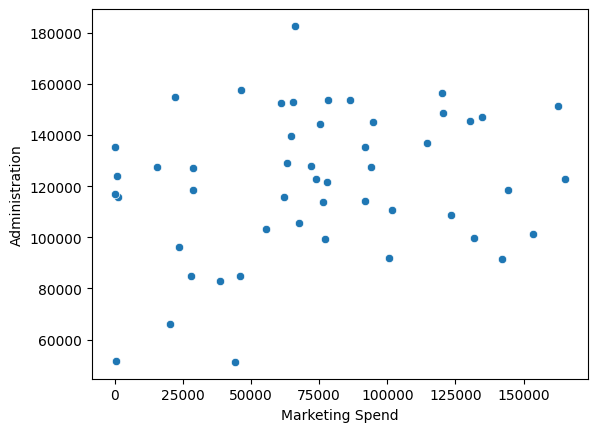

In [86]:
sns.scatterplot(x='Marketing Spend',y='Administration',data=df)

<AxesSubplot:xlabel='Marketing Spend', ylabel='Transport'>

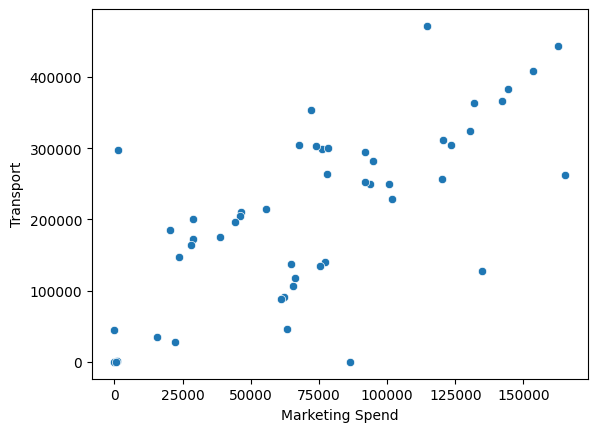

In [87]:
sns.scatterplot(x='Marketing Spend',y='Transport',data=df)

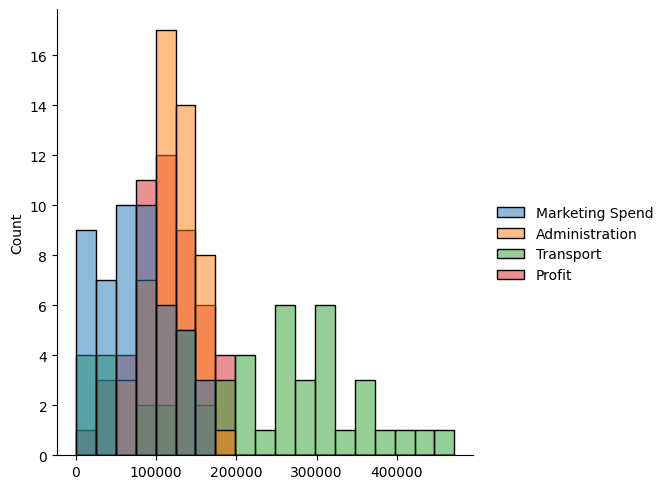

In [88]:
sns.displot(data=df)

<AxesSubplot:>

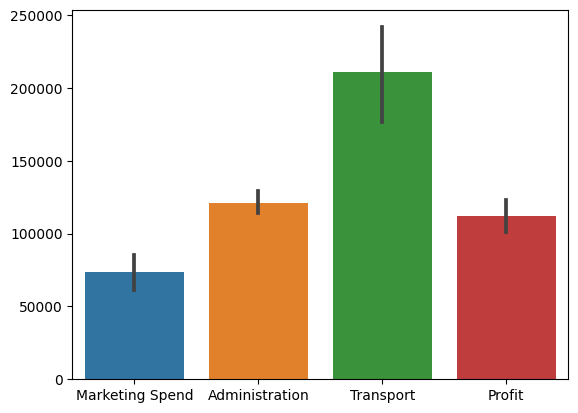

In [89]:
sns.barplot(data=df)

<AxesSubplot:>

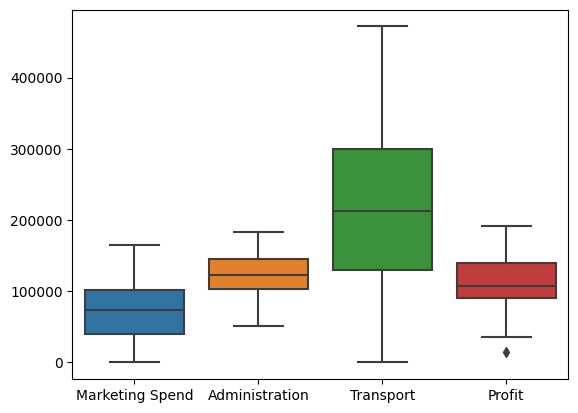

In [90]:
sns.boxplot(data=df)

<AxesSubplot:>

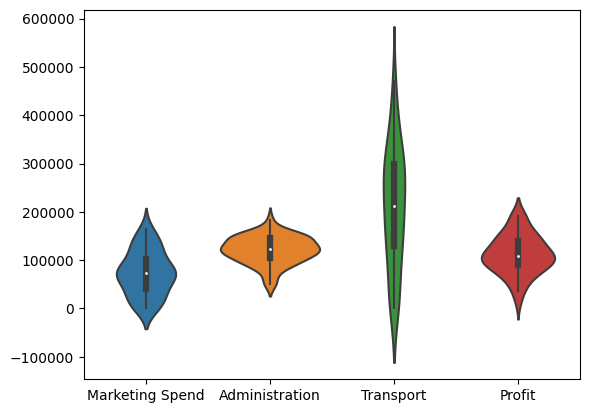

In [91]:
sns.violinplot(data=df)

In [92]:
df.dtypes

Marketing Spend    float64
Administration     float64
Transport          float64
Area                object
Profit             float64
dtype: object

In [93]:
df.drop('Area',axis=1,inplace=True)

In [94]:
df.head()

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [95]:
x=df.drop('Profit',axis=1).values
y=df['Profit'].values

In [96]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 3)
(10, 3)
(40,)
(10,)


In [99]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()

x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [100]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [101]:
lr.score(x_test,y_test)

0.9009438688392024

In [102]:
pred=lr.predict(x_test)

In [103]:
pred_df=pd.DataFrame(pred)
pred_df

,0
0,105494.630530
1,128723.458366
2,129919.011524
3,73796.748272
4,176638.752362
5,122186.275663
6,68438.797080
7,96706.769333
8,118918.157593
9,164898.630275


In [104]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print('R2 Score:',r2_score(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print('mean_squared_error:',mean_squared_error(y_test,pred))

R2 Score: 0.9009438688392024
mean_absolute_error: 9296.508657300012
mean_squared_error: 126682053.3769546


# RandomForest Regression Model

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

clf=RandomForestRegressor(random_state=42)

param={'n_estimators':[100,200,300],
      'max_depth':[1,2,3,4,5],
      'min_samples_split':[1,2,3],
      'max_features':[1,2,3,4,5],
      'max_samples':[1,2,3,4,5]
      }

model=GridSearchCV(clf,param,cv=3)

model.fit(x_train,y_train)

c:\users\malabar tech\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2025 fits failed out of a total of 3375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1125 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\malabar tech\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\malabar tech\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "c:\users\malabar tech\appdata\local\programs\python\pytho

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200, 300]})

In [174]:
model.best_params_

{'max_depth': 4,
 'max_features': 2,
 'max_samples': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [227]:
model=RandomForestRegressor(
                           max_depth=4,
                           max_features=2,
                           max_samples=5,
                           min_samples_split=2,
                           n_estimators=100
                           )

model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, max_features=3, max_samples=5)

In [228]:
model.score(x_test,y_test)

0.7543241432676948

In [229]:
pred=model.predict(x_test)
pred_df=pd.DataFrame(pred)
pred_df

,0
0,97992.4438
1,127387.4047
2,125384.7125
3,84535.3374
4,152074.9026
5,124100.1864
6,83627.8834
7,95361.3935
8,116759.1068
9,145719.1209


In [230]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print('R2 Score:',r2_score(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print('mean_squared_error:',mean_squared_error(y_test,pred))

R2 Score: 0.7543241432676948
mean_absolute_error: 13909.97060000003
mean_squared_error: 314192787.7787747


# RandomForest Regressor Without Hyperparameter Tuning

In [231]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor()

reg.fit(x_train,y_train)

RandomForestRegressor()

In [234]:
print("Testing Score",reg.score(x_test,y_test))
print("Training Score",reg.score(x_train,y_train))

Testing Score 0.9468029090449069
Training Score 0.9852388998006351


In [236]:
pred=reg.predict(x_test)
pred_df=pd.DataFrame(pred)
pred_df

,0
0,104169.9085
1,136381.7574
2,136538.9060
3,79501.1239
4,180429.8738
5,120519.2179
6,69176.2354
7,99226.9575
8,114324.3850
9,163889.2171


In [237]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print('R2 Score:',r2_score(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print('mean_squared_error:',mean_squared_error(y_test,pred))

R2 Score: 0.9468029090449069
mean_absolute_error: 6624.90131000002
mean_squared_error: 68033312.39468876
